In [99]:
#importing the libraries and tools
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn import datasets
import pandas as pd
import numpy as np

In [117]:
#loading data
d = pd.read_csv('Iris.csv')
x = d[['sepal_length','sepal_width']]
y = d[['species']]

In [118]:
# partition and giving each partition some vlues
x = d.iloc[:, 0:2].values
y = d.iloc[:, 4].values

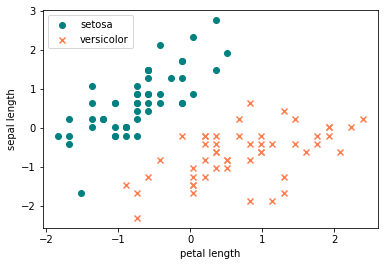

In [128]:
plt.scatter(x[:50, 0], x[:50, 1], color='teal', marker='o', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color='coral', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [120]:
class Perceptron:
    def __init__(self,learning_rate):
        self.baias = 0.0 
        self.weight = None
        self.mis = []
#Fit training data

    def fit(self, x: np.array, y: np.array, niter =10):
        self.baias = 0.0 
        self.weight = np.zeros(x.shape[1])
        self.mis = []

        for _ in range(niter ):
# Number of misclassifications
            er = 0
            for xi, yi in zip(x, y):
                n = 0.1 * (yi - self.predict(xi))
                self.baias += n
                self.weight += n * xi
                er += int(n != 0.0)
            self.mis.append(er)
#Calculate net input

    def f(self, x: np.array) -> float:
        return np.dot(x, self.weight) + self.baias
# detect class
    def predict(self, x: np.array):
        return np.where(self.f(x) >= 0, 1, -1)

In [121]:
from sklearn.model_selection import train_test_split
y = d.iloc[:, 4].values
x = d.iloc[:, 0:3].values
# reducing the dimensionality of the data
x = x[0:100, 0:2]  
y = y[0:100]
y = np.where(y == 'setosa', 1, -1)
x[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
x[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()
x_trn, x_tst, y_trn, y_tst = train_test_split(x, y, test_size=0.25,random_state=0)
classifier = Perceptron(learning_rate=0.01)
classifier.fit(x_trn, y_trn)

In [126]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(x, y):
    resolution = 0.001
    
    # define a set of markers
    markers = ('x', 'o')
    # define available colors
    cmap = ListedColormap(('sienna', 'khaki'))
    
    # select a range of x containing the scaled test set
    x1_min, x1_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    x2_min, x2_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    
    # create a grid of values to test the classifier on
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    D = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    D = D.reshape(xx1.shape)
    
    # plot the decision region...
    plt.contourf(xx1, xx2, D, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # ...and the points from the test set
    for idx, f in enumerate(np.unique(y)):
        plt.scatter(x=x[y == f, 0],
                    y=x[y == f, 1], 
                    alpha=0.8, 
                    c=cmap(idx), 
                    marker=markers[idx], 
                    label=f)
    plt.show()

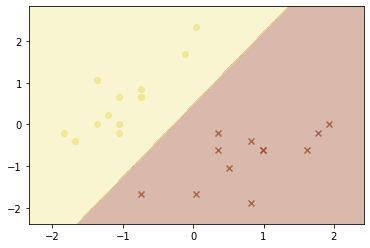

In [127]:
plot_decision_regions(x_tst, y_tst)